In [282]:
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

In [283]:
def save_picture(filename, source):
  image = Image.fromarray(np.uint8(source))
  image.save(filename, dpi=(200, 200))

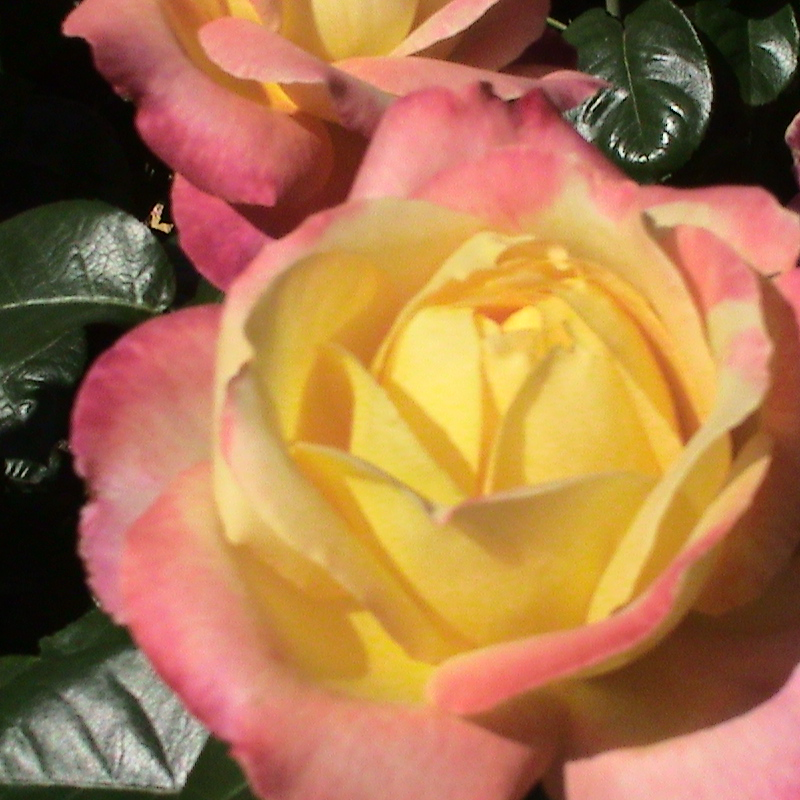

In [284]:
img = cv.imread('LovePeace rose.tif')
cv2_imshow(img)

In [285]:
B,G,R = cv.split(img)
save_picture('R.png', R)
save_picture('G.png', G)
save_picture('B.png', B)

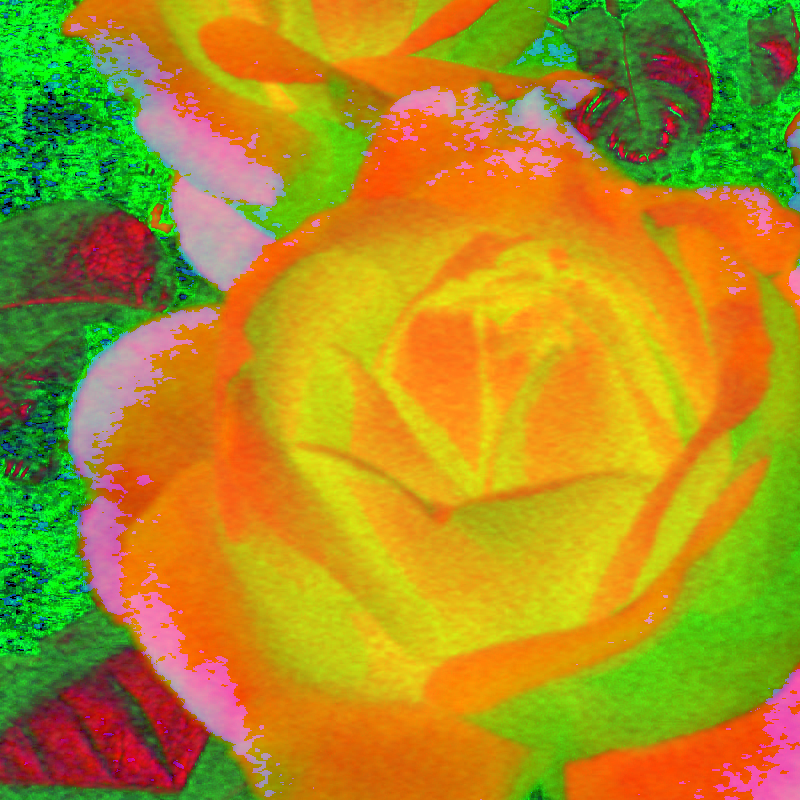

In [286]:
HSI = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv2_imshow(HSI)

In [287]:
H,S,I = cv.split(HSI)
save_picture('H.png', H)
save_picture('S.png', S)
save_picture('I.png', I)

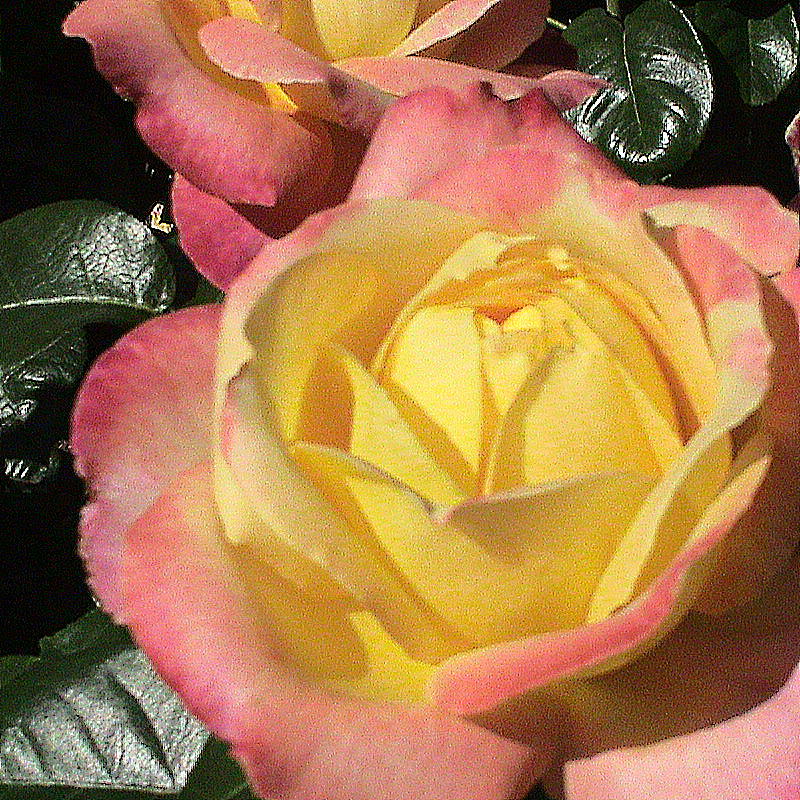

In [288]:
#RGB sharpening

kernel = np.array([[-1, -1, -1],
           [-1,  9, -1],
           [-1, -1, -1]], dtype = np.double)

R_filtered = cv.filter2D(R, ddepth = -1, kernel=kernel, borderType=cv.BORDER_DEFAULT)
G_filtered = cv.filter2D(G, ddepth = -1, kernel=kernel, borderType=cv.BORDER_DEFAULT)
B_filtered = cv.filter2D(B, ddepth = -1, kernel=kernel, borderType=cv.BORDER_DEFAULT)

BGR_sharpen = cv.merge([B_filtered, G_filtered, R_filtered])
cv2_imshow(BGR_sharpen)
save_picture('RGB_sharpened.png', cv.cvtColor(BGR_sharpen, cv.COLOR_BGR2RGB))

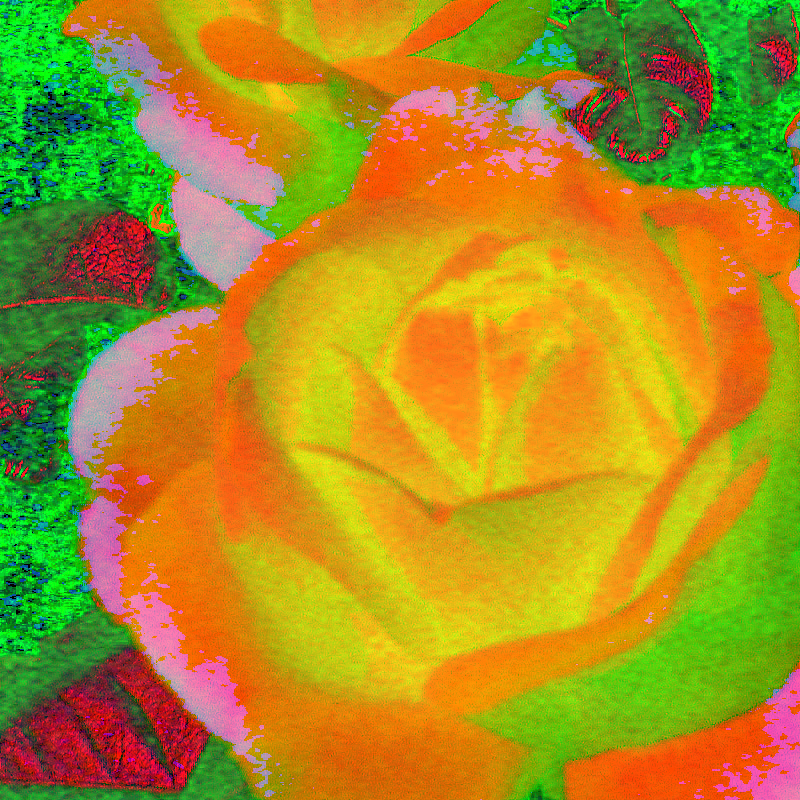

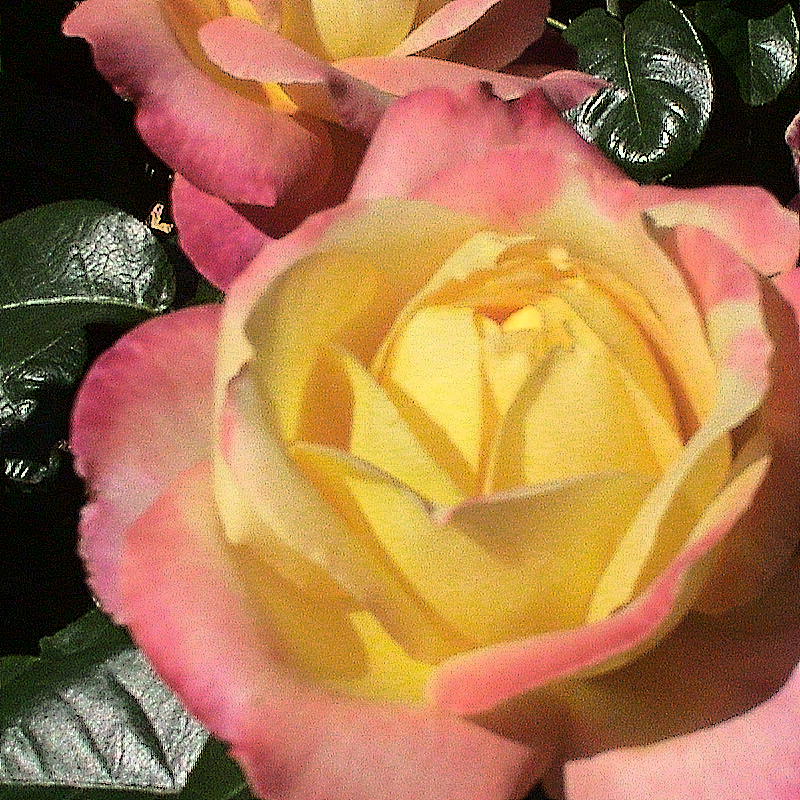

In [289]:
#HSI sharpening
I_filtered = cv.filter2D(I, ddepth = -1, kernel=kernel, borderType=cv.BORDER_DEFAULT)

HSI_sharpen = cv.merge([H, S, I_filtered])
cv2_imshow(HSI_sharpen)
HSI_sharpen2BGR = cv.cvtColor(HSI_sharpen, cv.COLOR_HSV2BGR)
cv2_imshow(HSI_sharpen2BGR)
save_picture('HSI_sharpened.png', cv.cvtColor(HSI_sharpen2BGR, cv.COLOR_BGR2RGB))

[[128.33333333 128.         127.66666667 ... 128.33333333 127.66666667
  142.66666667]
 [130.66666667 132.66666667 126.         ... 129.66666667 128.
  131.        ]
 [131.         134.33333333 130.66666667 ... 127.66666667 128.
  135.        ]
 ...
 [133.         139.         129.66666667 ... 128.33333333 134.66666667
  115.        ]
 [134.         140.         123.66666667 ... 129.66666667 123.
  122.33333333]
 [122.33333333 123.33333333 120.66666667 ... 138.         127.66666667
  129.        ]]


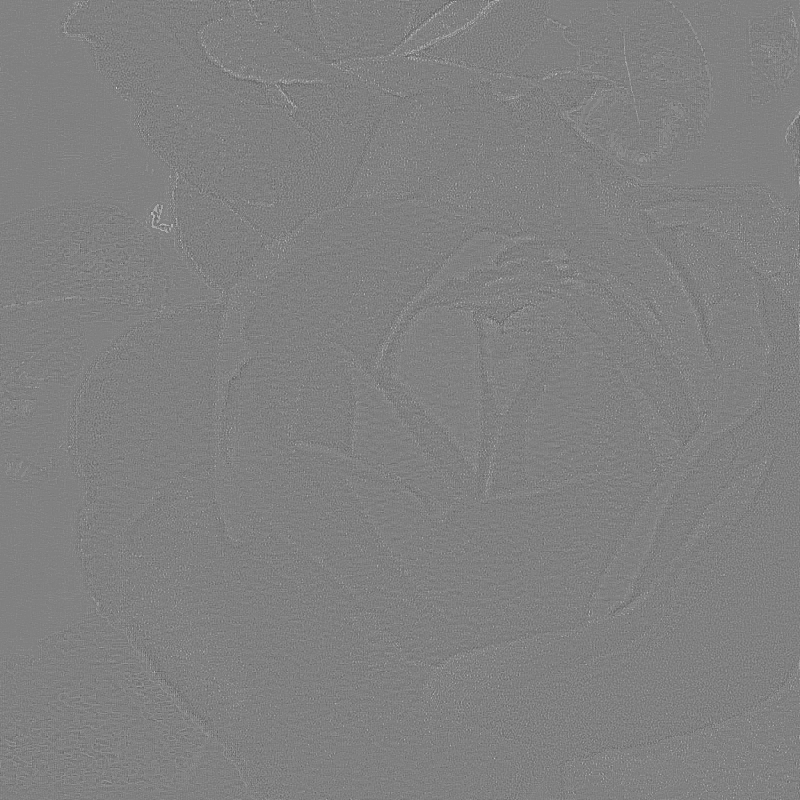

In [290]:
#difference the image
diff_img = np.zeros((img.shape[0], img.shape[1]))


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        deltaB = int(BGR_sharpen[i][j][0]) - int(HSI_sharpen2BGR[i][j][0])
        deltaG = int(BGR_sharpen[i][j][1]) - int(HSI_sharpen2BGR[i][j][1])
        deltaR = int(BGR_sharpen[i][j][2]) - int(HSI_sharpen2BGR[i][j][2])
        diff_img[i][j] = (deltaB + deltaG + deltaR) / 3 + 128

print(diff_img)
cv2_imshow((diff_img))